<a href="https://colab.research.google.com/github/Bagyalakshmi1429/Deep-Learning/blob/main/2348508_lab2_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

In [2]:
df = pd.read_csv("/content/final_data.csv")

In [3]:
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2018-04-01 00:00:31,596.0,3156.0,57.16,31.0,0.0,0.0,0.0
1,1,1,2018-04-01 00:02:10,4961.0,3412.0,81.51,130.0,0.0,0.0,0.0
2,2,2,2018-04-01 00:07:56,2.0,1365.0,146.00,476.0,0.0,0.0,0.0
3,3,3,2018-04-01 00:09:29,4128.0,8737.0,64.49,569.0,0.0,0.0,0.0
4,4,4,2018-04-01 00:10:34,927.0,9906.0,50.99,634.0,0.0,0.0,0.0


In [4]:
df.shape

(51594, 10)

In [7]:
df.columns

Index(['Unnamed: 0', 'TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID',
       'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS',
       'TX_FRAUD', 'TX_FRAUD_SCENARIO'],
      dtype='object')

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt


In [8]:
# Data Preprocessing
# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['TX_AMOUNT', 'TX_TIME_SECONDS']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [9]:
# Handling missing values (if any)
imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

In [10]:
# Encoding categorical features
categorical_features = ['TX_FRAUD_SCENARIO']
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

In [11]:
# Splitting the dataset into training and testing
X = df.drop(['TX_FRAUD', 'TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_TIME_DAYS'], axis=1)
y = df['TX_FRAUD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Model Development
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# Training
# Using Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20
645/645 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.9767 - val_loss: nan - val_accuracy: 0.9985
Epoch 2/20
645/645 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 3/20
645/645 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 4/20
645/645 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 5/20
645/645 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 6/20
645/645 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 7/20
645/645 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 8/20
645/645 [============================

In [14]:
# Using SGD optimizer
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20
645/645 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 2/20
645/645 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 3/20
645/645 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 4/20
645/645 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 5/20
645/645 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 6/20
645/645 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 7/20
645/645 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9985
Epoch 8/20
645/645 [============================

In [15]:
# Evaluation and Validation
# Evaluate the trained model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

323/323 [==============================] - 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Printing the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9985463707723616
Precision: [0.00145363 1.        ]
Recall: [1. 0.]
F1 Score: 0.0
ROC AUC Score: 0.5
Confusion Matrix:
[[10304     0]
 [   15     0]]


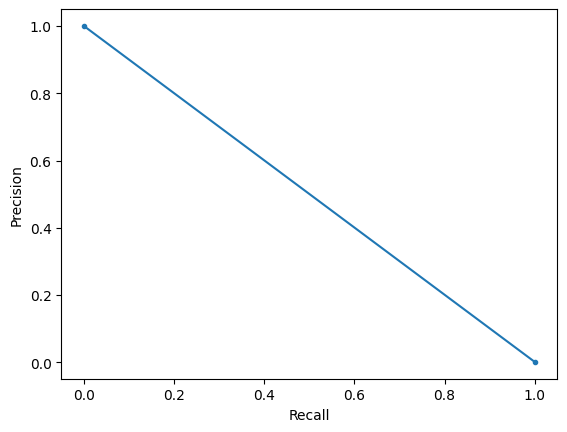

(0.9985463707723616,
 array([0.00145363, 1.        ]),
 array([1., 0.]),
 0.0,
 0.5,
 array([[10304,     0],
        [   15,     0]]))

In [16]:

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()